# Data Analysis Tools
### Week 2: Running a Chi-Square Test of Independence

The GapMinder dataset which I am examining has only one categorical variable: polity score, which is a measure of democratic tendencies of a nation. There are 21 categories, from -10 up through 0 to +10. In order to increase the number of data points in each category and to reduce the number of post hoc comparisons to perform, I binned the data into Low (-10 to -4), Mid (-3 to +3), and High (+3 to +10). To perform a chi-square test though, I need a second categorical variable, of only two categories. Because my base question is to examine internet use rates, I decided to bin this data into two bins: Low and High, and then perform a chi-square test of independence followed by post hoc tests.

First, load the data

In [23]:
'''
Code for Peer-graded Assignment: Running a Chi-Square Test of Independence
Course: Data Management and Visualization
Specialization: Data Analysis and Interpretation
'''
 
import pandas as pd
import seaborn as sns
import scipy.stats
 
data = pd.read_csv('./gapminder.csv', low_memory=False)

Set the variables to numeric

In [24]:
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
 
sub1 = data.copy()

Create dataframe with NAs dropped and internetuserate binned to be 'Low' and 'High,' and polityscore is binned to be 'Low,' 'Mid,' and 'High.'

In [25]:
sub3 = sub1[['internetuserate', 'polityscore']].dropna()
sub3['polityscore_binned'] = pd.cut(sub3.polityscore, 3, labels=['Low', 'Mid', 'High'])
sub3['internetuserate_binned'] = pd.cut(sub3.internetuserate, 2, labels=['Low', 'High'])

sub4 = sub3.copy()

#### Perform Chi-Square test for categorical to categorical variable comparison
 
Contingency table of observed counts

In [26]:
ct1 = pd.crosstab(sub4['internetuserate_binned'], sub4['polityscore_binned'])
ct1

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,23,27,62
High,5,1,37


Column percentiles

In [27]:
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
colpct

polityscore_binned,Low,Mid,High
internetuserate_binned,,,
Low,0.821429,0.964286,0.626263
High,0.178571,0.035714,0.373737


Chi-square value, p-value, expected counts

In [28]:
cs1= scipy.stats.chi2_contingency(ct1)
cs1

(14.106815515141927,
 0.0008644580686778272,
 2,
 array([[20.23225806, 20.23225806, 71.53548387],
        [ 7.76774194,  7.76774194, 27.46451613]]))

Graph percent with internet use rate within each polity score group 

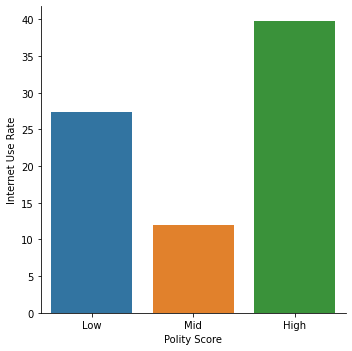

In [29]:
from matplotlib import pyplot as plt


sns.catplot(x="polityscore_binned", y="internetuserate", data=sub4, kind="bar", errorbar=None)
plt.xlabel('Polity Score')
plt.ylabel('Internet Use Rate')
plt.show()

### Perform post-hoc tests

#### Compare Low Polity Score with Mid Polity Score

In [30]:
recode1 = {'Low': 'Low', 'Mid': 'Mid'}
sub4['COMP-Low-v-Mid']= sub4['polityscore_binned'].map(recode1)

Contingency table of observed counts

In [31]:
ct2=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Low-v-Mid'])
ct2

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,23,27
High,5,1


Column percentages

In [32]:
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
colpct

COMP-Low-v-Mid,Low,Mid
internetuserate_binned,,
Low,0.821429,0.964286
High,0.178571,0.035714


Chi-square value, p-value, expected counts

In [33]:
cs2= scipy.stats.chi2_contingency(ct2)
cs2

(1.68,
 0.19492445251365376,
 1,
 array([[25., 25.],
        [ 3.,  3.]]))

#### Compare Low Polity Score with High Polity Score

In [34]:
recode2 = {'Low': 'Low', 'High': 'High'}
sub4['COMP-Low-v-High']= sub4['polityscore_binned'].map(recode2)

Contingency table of observed counts

In [35]:
ct3=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Low-v-High'])
ct3

COMP-Low-v-High,High,Low
internetuserate_binned,,
Low,62,23
High,37,5


Column percentages

In [36]:
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
colpct

COMP-Low-v-High,High,Low
internetuserate_binned,,
Low,0.626263,0.821429
High,0.373737,0.178571


Chi-square value, p-value, expected counts

In [37]:
cs3= scipy.stats.chi2_contingency(ct3)
cs3

(2.9260991012566637,
 0.08715785476442026,
 1,
 array([[66.25984252, 18.74015748],
        [32.74015748,  9.25984252]]))

#### Compare Mid Polity Score with High Polity Score

In [38]:
recode3 = {'Mid': 'Mid', 'High': 'High'}
sub4['COMP-Mid-v-High']= sub4['polityscore_binned'].map(recode3)

Contingency table of observed counts

In [39]:
ct4=pd.crosstab(sub4['internetuserate_binned'], sub4['COMP-Mid-v-High'])
ct4

COMP-Mid-v-High,High,Mid
internetuserate_binned,,
Low,62,27
High,37,1


Column percentages

In [40]:
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
colpct

COMP-Mid-v-High,High,Mid
internetuserate_binned,,
Low,0.626263,0.964286
High,0.373737,0.035714


Chi-square value, p-value, expected counts

In [41]:
cs4= scipy.stats.chi2_contingency(ct4)
cs4

(10.33624298979488,
 0.00130443250866551,
 1,
 array([[69.37795276, 19.62204724],
        [29.62204724,  8.37795276]]))

An interesting result of the data is that countries with the lowest internet use rates fall in the mid-range of polity scores (96% of low internet use countries have a polity score between -3 and +3). I attribute this to the fact that countries with both very high and very low polity scores have to have significantly developed governments and infrastructure systems in place in order to control the citizens of the country with either the rule of law (countries with high polity scores) or the rule of a strong-arm dictator (countries with low polity scores). Both of these types of countries need infrastructure, and therefore internet, to survive. However, countries with middle polity scores are more tribal and less likely to have infrastructure such as internet. An X2 of 14.1 and p-value of 0.00086 means these findings are significant.

Post hoc comparisons of internet rates by polity score show that internet use rates were statistically different for the Mid to High polity score comparison, with a p-value of 0.00130 (< 0.003 of the Bonferroni Adjustment). Conversely, the Low to Mid and Low to High comparisons did not exceed the Bonferroni Adjustment, with p-values of 0.195 and 00872, respectively.